# 导入依赖

In [1]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings(action='once')

large = 22
medium = 16
small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': medium,
          'figure.figsize': (16, 10),
          'axes.labelsize': medium,
          'xtick.labelsize': medium,
          'ytick.labelsize': medium,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

print(mpl.__version__)
print(sns.__version__)

3.5.2
0.11.2


# 图1 散点图

散点图是用于研究两个变量之间关系的经典且基本的图。如果数据中有多个组，可以使用`plt.scatterplot()`，以不同的颜色可视化每个组。

说明：原代码运行警告`*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*. Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.`，解决方法是`np.array(color).reshape(1,-1)`


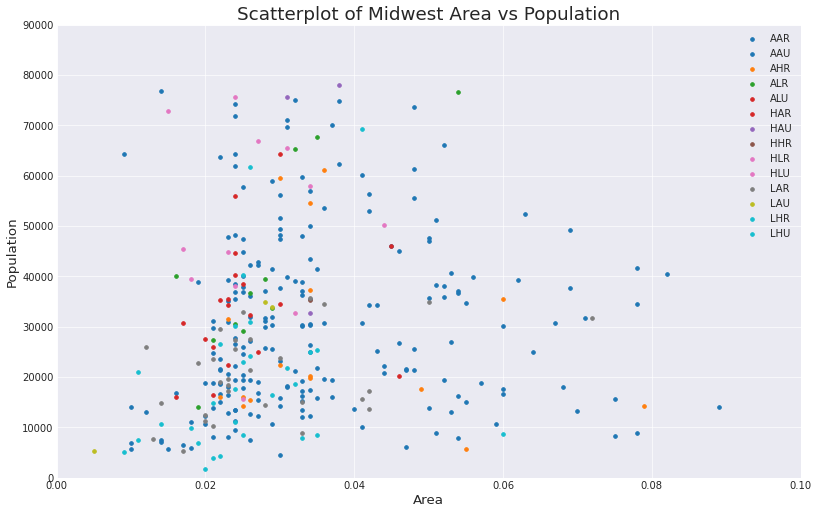

In [9]:
# Import dataset
# midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest = pd.read_csv("../data/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [np.array(plt.cm.tab10(i / float(len(categories) - 1))).reshape(1, -1) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi=60, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category == category, :], s=20, c=colors[i],
                label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

# 图2 带环绕的气泡图

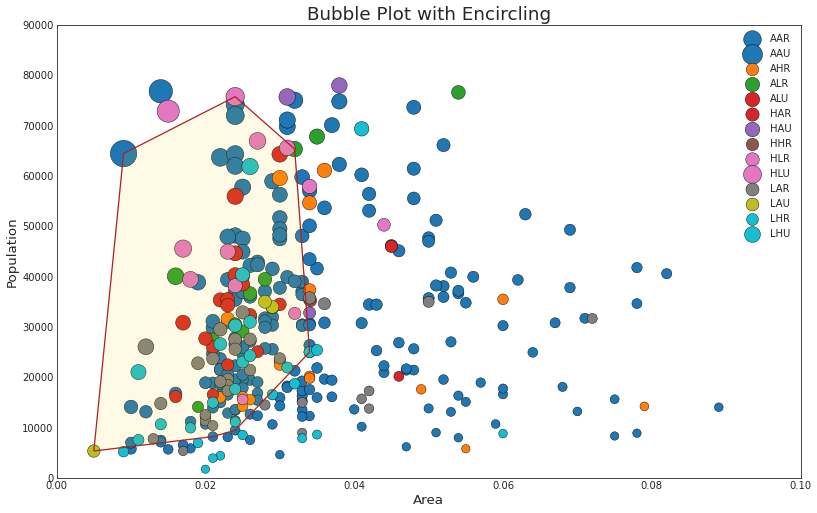

In [10]:
from scipy.spatial import ConvexHull

warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
# midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest = pd.read_csv("../data/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [np.array(plt.cm.tab10(i / float(len(categories) - 1))).reshape(1, -1) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi=60, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category == category, :], s='dot_size', c=colors[i],
                label=str(category), edgecolors='black', linewidths=.5)


# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state == 'IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show()

# 图3 具有最佳拟合线性回归线的散点图

想要禁用分组并仅为整个数据集绘制一条最佳拟合线，应该从`sns.lmplot()`中删除参数`hue='cyl'`

直接运行报错`ModuleNotFoundError: No module named 'statsmodels'`，需要`pip install statsmodels`

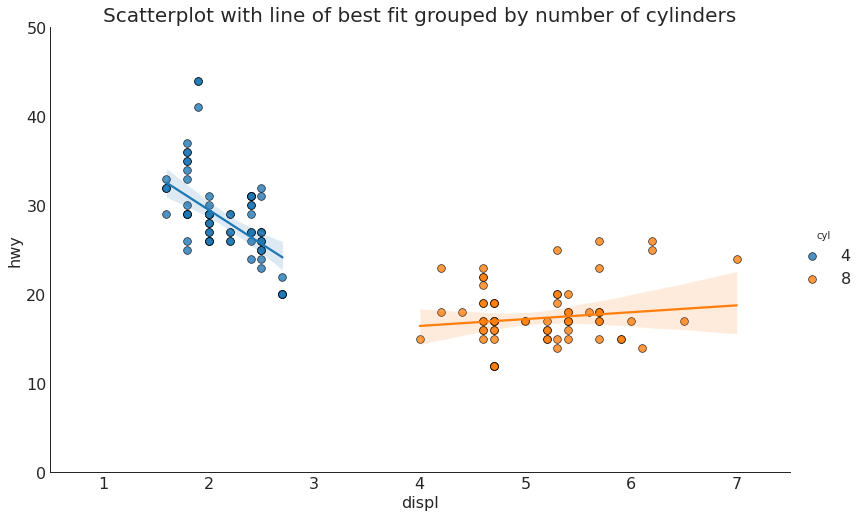

In [12]:
# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot
sns.set_style("white")
grid_obj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
grid_obj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()